创建数据集

In [5]:
from numpy import *
train_data = array( [[20,3 ],[15,5],[18,1],[5,17],[2,15],[3,20]])
train_label = ["服务策略","服务策略","服务策略","平台策略","平台策略","平台策略"]
test_data = array([[4, 17]])
train_data, train_label, test_data

(array([[20,  3],
        [15,  5],
        [18,  1],
        [ 5, 17],
        [ 2, 15],
        [ 3, 20]]),
 ['服务策略', '服务策略', '服务策略', '平台策略', '平台策略', '平台策略'],
 array([[ 4, 17]]))

绘制图像

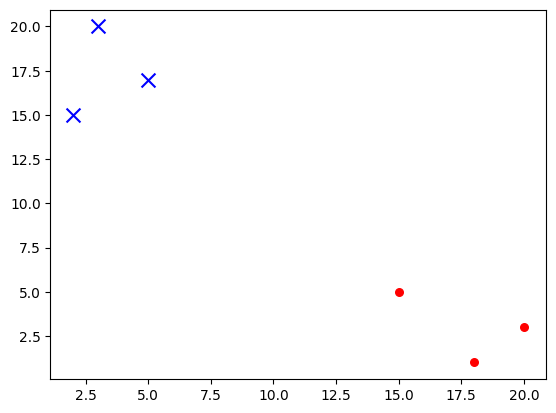

In [6]:
import matplotlib.pyplot as pyplot
x=[item[0] for item in train_data[:3]]
y=[item[1] for item in train_data[:3]]
pyplot.scatter(x,y,s=30,c="r",marker="o")
x=[item[0] for item in train_data[3:6]]
y=[item[1] for item in train_data[3:6]]
pyplot.scatter(x,y,s=100,c="b",marker="x")
pyplot.show()

求测试数据与每一个训练数据的距离

In [7]:
test_data_tile = tile(test_data, (train_data.shape[0], 1))
test_data_tile

array([[ 4, 17],
       [ 4, 17],
       [ 4, 17],
       [ 4, 17],
       [ 4, 17],
       [ 4, 17]])

In [8]:
distances = ((test_data_tile - train_data)**2).sum(axis=1)**0.5
distances

array([21.26029163, 16.2788206 , 21.26029163,  1.        ,  2.82842712,
        3.16227766])

取前k=3个距离最小的训练数据的标签,并匹配最多次数的标签

In [9]:
import operator
sorted_distances = distances.argsort()
class_count = {}
for i in range(3):
    class_count[train_label[sorted_distances[i]]] = class_count.get(
        train_label[sorted_distances[i]], 0)+1
sorted_class_count = sorted(
    class_count.items(), key=operator.itemgetter(1), reverse=True
)
sorted_class_count[0][0]

'平台策略'